<center><h1><b>8주차 ✅ HeartAttack EDA</b></h1></center>

-----

### Data URL
https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset?select=heart.csv

https://archive.ics.uci.edu/ml/datasets/Heart+Disease

### Columns
- Age : Age of the patient
- Sex : Sex of the patient
  - female: 0, male: 1
- exang: exercise induced angina
  - (1 = yes; 0 = no)
- ca: number of major vessels
  - (0-3)
- cp : Chest Pain type
  - Value 1: typical angina
  - Value 2: atypical angina
  - Value 3: non-anginal pain
  - Value 4: asymptomatic
- trtbps : resting blood pressure (in mm Hg)
- chol : cholestoral in mg/dl fetched via BMI sensor
- fbs : (fasting blood sugar > 120 mg/dl)
  - (1 = true; 0 = false)
- rest_ecg : resting electrocardiographic results
  - Value 0: normal
  - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
  - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
- thalach : maximum heart rate achieved
- thal
  - 3 = normal (정상)
  - 6 = fixed defect (고정된 결함)
  - 7 = reversable defect (가역적 결함)
- slp: the slope of the peak exercise ST segment
  - Value 1: upsloping
  - Value 2: flat
  - Value 3: downsloping
- oldpeak = ST depression induced by exercise relative to rest
  - 휴식에 비해 운동으로 유발된 ST 우울증
- output
  - 0 = less chance of heart attack
  - 1 = more chance of heart attack

![columns](columns.png)

----

## 라이브러리

In [255]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


----

## 데이터 가져오기

In [334]:
raw = pd.read_csv('data/heart.csv')
raw.shape

(303, 14)

In [335]:
raw.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [336]:
raw.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


---

## Basic EDA

In [337]:
"""
1. 모두 수치형 자료형 (범주형으로 변경 필요성)
2. null 값 없음 (info 상에서는)
"""

raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


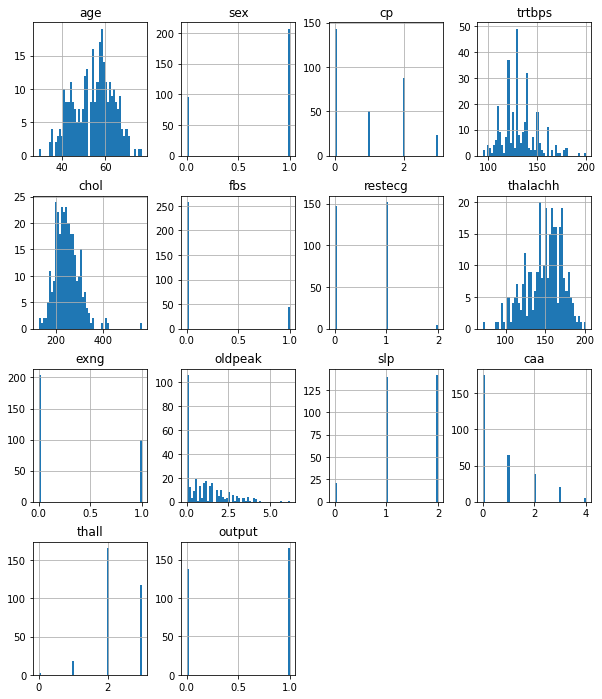

In [338]:
"""
대부분 정규분포 형태인듯?
- 수치형 데이터 왜도/첨도 구해보기
- chol 정도 이상치 구분 필요
"""

raw.hist(figsize=(10, 12), bins=50)
plt.show()

### 범주화

In [339]:
# 범주형으로 변경할 컬럼들
raw.nunique() < 10


age         False
sex          True
cp           True
trtbps      False
chol        False
fbs          True
restecg      True
thalachh    False
exng         True
oldpeak     False
slp          True
caa          True
thall        True
output       True
dtype: bool

In [340]:
# 범주형 배열 만들기
cates = [c for c, b in (raw.nunique() < 10).iteritems() if b and c != 'output']
cates

['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']

In [341]:
# 범주형으로 변경
raw[cates] = raw[cates].astype('object')
raw.select_dtypes('object').columns.tolist() # 제대로 변경되었는지 확인

['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']

In [342]:
# 수치형 배열
nums = list(set(raw.columns) - set(cates))
nums

['trtbps', 'oldpeak', 'chol', 'output', 'age', 'thalachh']

### 범주형 빈도 수

In [343]:
"""
sex: male이 많음
cp: 4가지 유형 중 1유형이 반 정도. (전형적인 협심증 환자)
fbs: true에 데이터가 몰려있음
restecg: 공복혈당 없는 사람들이 대부분
exng: 운동성 협심증도 없는 사람들이 대부분
slp: 플랫, 내리막이 대부분을 차지
thall: 유형은 3개인데 데이터에는 4개의 유형이 있음 (0은 결측치인가)
"""

# 범주형 value counts
for c in cates:
    df_c = (raw[c].value_counts(normalize=True) * 100).to_frame(name='%')
    df_c = pd.concat([raw[c].value_counts().to_frame(), df_c], axis=1)
    display(df_c)

,sex,%
1,207,68.316832
0,96,31.683168


,cp,%
0,143,47.194719
2,87,28.712871
1,50,16.501650
3,23,7.590759


,fbs,%
0,258,85.148515
1,45,14.851485


,restecg,%
1,152,50.165017
0,147,48.514851
2,4,1.320132


,exng,%
0,204,67.326733
1,99,32.673267


,slp,%
2,142,46.864686
1,140,46.204620
0,21,6.930693


,caa,%
0,175,57.755776
1,65,21.452145
2,38,12.541254
3,20,6.600660
4,5,1.650165


,thall,%
2,166,54.785479
3,117,38.613861
1,18,5.940594
0,2,0.660066


### describe

In [344]:
# 범주형 describe
raw.describe(include='object').T

,count,unique,top,freq
sex,303,2,1,207
cp,303,4,0,143
fbs,303,2,0,258
restecg,303,3,1,152
exng,303,2,0,204
slp,303,3,2,142
caa,303,5,0,175
thall,303,4,2,166


In [345]:
# 수치형 describe
raw.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2
output,303.0,0.544554,0.498835,0.0,0.0,1.0,1.0,1.0


### 왜도, 첨도

In [346]:
# 왜도값 구하기
raw[nums].skew().to_frame(name='skew(왜도)')

,skew(왜도)
trtbps,0.713768
oldpeak,1.269720
chol,1.143401
output,-0.179821
age,-0.202463
thalachh,-0.537410


In [347]:
# 첨도값 구하기
raw[nums].kurt().to_frame(name='kurt(첨도)')


,kurt(첨도)
trtbps,0.929054
oldpeak,1.575813
chol,4.505423
output,-1.980783
age,-0.542167
thalachh,-0.061970


### 중복값

In [348]:
dup = raw[raw.duplicated()]
dup

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [349]:
dups = (raw['age'] == dup['age'].iloc[0]) & (raw['thalachh'] == dup['thalachh'].iloc[0]) & (raw['trtbps'] == dup['trtbps'].iloc[0])
raw[dups]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [350]:
raw = raw.drop_duplicates()
raw.shape

(302, 14)

### 이상치

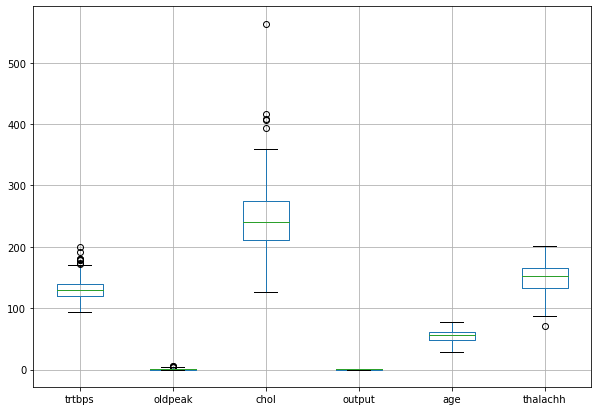

In [351]:
"""
chol 이상치 제거 필요
"""
_ = raw[nums].boxplot(figsize=(10, 7))

In [352]:
def outlier_df(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    rbound = Q1 - 1.5 * IQR
    lbound = Q3 + 1.5 * IQR
    outlier = data[(rbound > data[col]) | (data[col] > lbound)]
    print(f"하한값 : {rbound},  상한값 : {lbound}")
    return outlier, rbound, lbound


In [353]:
chol_out, chol_rbound, chol_lbound = outlier_df(raw, 'chol')
chol_out

하한값 : 115.375,  상한값 : 370.375


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
28,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1
85,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
96,62,0,0,140,394,0,0,157,0,1.2,1,0,2,1
220,63,0,0,150,407,0,0,154,0,4.0,1,3,3,0
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0


In [354]:
# 상한값으로 채워넣기
raw.loc[raw["chol"] > chol_lbound, "chol"] = chol_lbound
raw.loc[raw["chol"] > chol_lbound, "chol"]

Series([], Name: chol, dtype: float64)

---

## 시각화

### 범주형

In [355]:
cates

['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']

In [356]:
def count_plot(cate):
    # display(raw[['output', cate]].value_counts().to_frame())
    fig = sns.countplot(data=raw, x='output', hue=cate)
    fig.set_title(cate)
    plt.show()

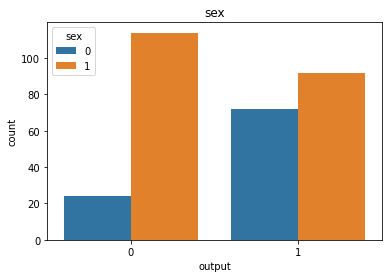

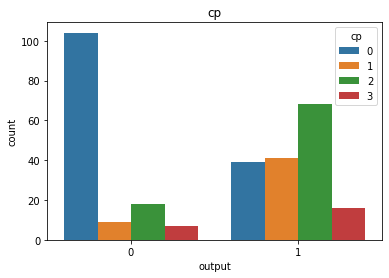

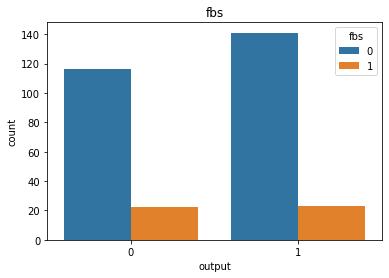

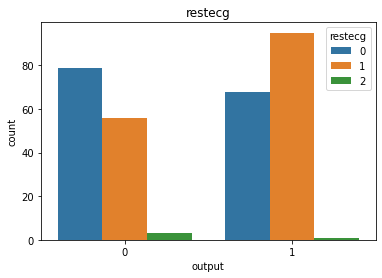

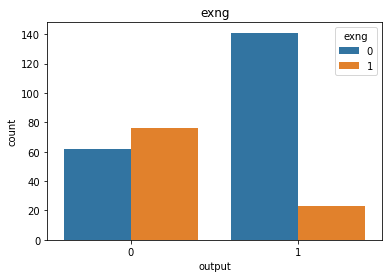

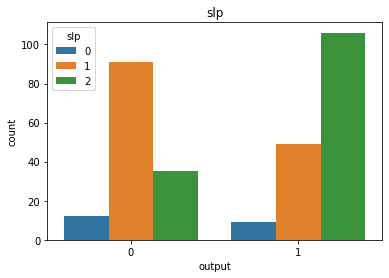

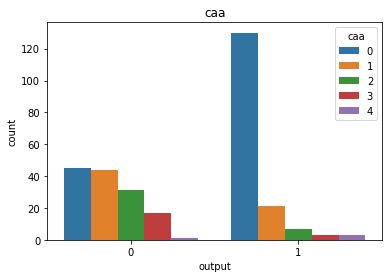

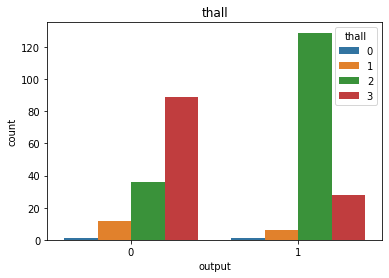

In [357]:
for cate in cates:
    count_plot(cate)

### 수치형

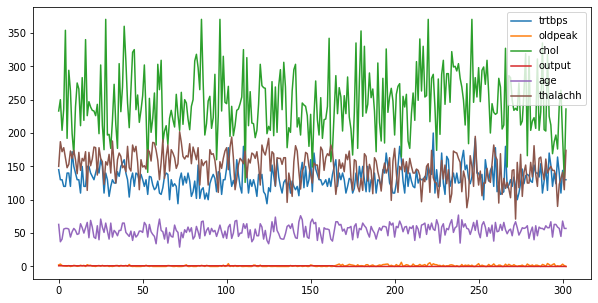

In [358]:
_ = raw[nums].plot(figsize=(10, 5))

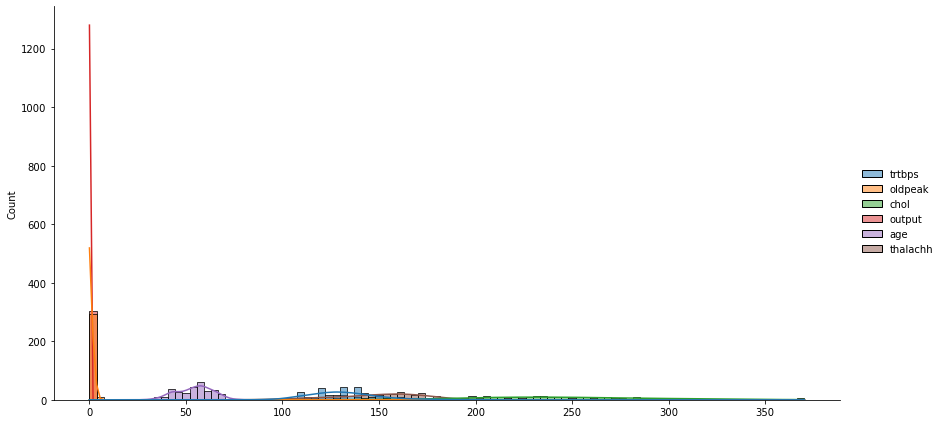

In [359]:
# 수치형 데이터
_ = sns.displot(raw[nums], bins=100, aspect=2, height=6, kde=True)

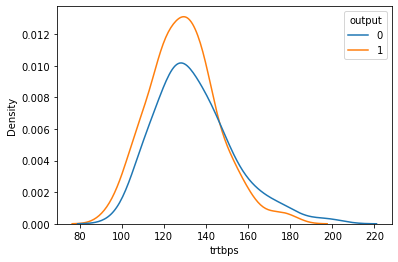

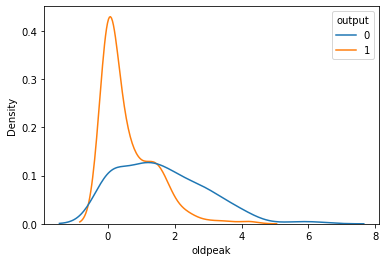

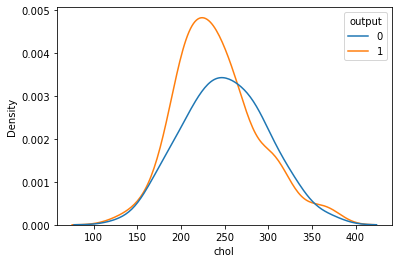

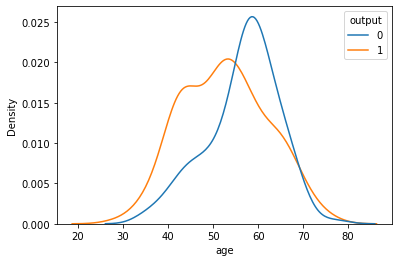

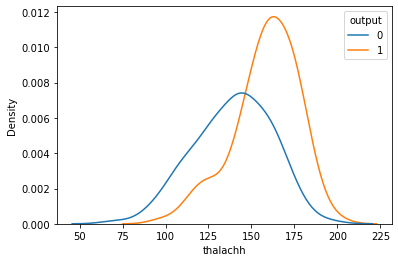

In [361]:
for num in nums:
    if num != 'output':
        sns.kdeplot(data=raw, x=num, hue='output')
        plt.show()

### 상관계수

In [362]:
raw.corr().style.background_gradient()


,age,trtbps,chol,thalachh,oldpeak,output
age,1.000000,0.283121,0.198901,-0.395235,0.206040,-0.221476
trtbps,0.283121,1.000000,0.143914,-0.048023,0.194600,-0.146269
chol,0.198901,0.143914,1.000000,-0.014096,0.040032,-0.099932
thalachh,-0.395235,-0.048023,-0.014096,1.000000,-0.342201,0.419955
oldpeak,0.206040,0.194600,0.040032,-0.342201,1.000000,-0.429146
output,-0.221476,-0.146269,-0.099932,0.419955,-0.429146,1.000000


-----

## 데이터 전처리

In [363]:
label_name = 'output'
label_name

'output'

In [364]:
features_name = raw.columns.to_list()
features_name.remove(label_name)
features_name

['age',
 'sex',
 'cp',
 'trtbps',
 'chol',
 'fbs',
 'restecg',
 'thalachh',
 'exng',
 'oldpeak',
 'slp',
 'caa',
 'thall']

In [365]:
X = raw[features_name]
X.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233.0,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250.0,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204.0,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236.0,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354.0,0,1,163,1,0.6,2,0,2


In [366]:
y = raw[label_name]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: output, dtype: int64

In [ ]:
# df_ohe = pd.get_dummies(X,  drop_first=True)
# df_ohe.head(1)

In [444]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(df_ohe)

In [461]:
X[ocols]

,sex,cp,fbs,restecg,exng,slp,caa,thall
0,1,3,1,0,0,0,0,1
1,1,2,0,1,0,0,0,2
2,0,1,0,0,0,2,0,2
3,1,1,0,1,0,2,0,2
4,0,0,0,1,1,2,0,2
...,...,...,...,...,...,...,...,...
298,0,0,0,1,1,1,0,3
299,1,3,0,1,0,1,0,3
300,1,0,1,1,0,1,2,3
301,1,0,0,1,1,1,1,3


In [467]:
ocols = X.select_dtypes('object').columns.tolist()
X[ocols] = X[ocols].apply(pd.to_numeric)
X[ocols].dtypes


/var/folders/21/dvhd5rm144sbp9s362bjvx400000gn/T/ipykernel_97749/1855315467.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[ocols] = X[ocols].apply(pd.to_numeric)


sex        int64
cp         int64
fbs        int64
restecg    int64
exng       int64
slp        int64
caa        int64
thall      int64
dtype: object

In [476]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    shuffle=True,
                                                    stratify=y,
                                                    random_state=42)

print('X_train.shape :',X_train.shape)
print('y_train.shape :',y_train.shape)
print('X_test.shape :',X_test.shape)
print('y_test.shape :',y_test.shape)

X_train.shape : (211, 13)
y_train.shape : (211,)
X_test.shape : (91, 13)
y_test.shape : (91,)


In [477]:
display(X_train.head(1))
display(X_test.head(1))
display(y_train.head(2))
display(y_test.head(2))

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
13,64,1,3,110,211.0,0,0,144,1,1.8,1,0,2


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
123,54,0,2,108,267.0,0,0,167,0,0.0,2,0,2


13     1
215    0
Name: output, dtype: int64

123    1
253    0
Name: output, dtype: int64

-----

## Modeling

In [478]:
def scoreModel(model, X_train, X_valid, y_train, y_valid):
    '''
        머신러닝 모델과 X_train, X_valid, y_train, y_valid 변수를 받아서
        모델명, 학습용 세트 정확도(R2 score), 테스트 세트 정확도(R2 score)를 출력하는 함수
    '''
    print("모델 : {}".format(model))
    print("학습용 세트 정확도: {:.3f}".format(model.score(X_train, y_train)))
    print("검증 세트 정확도: {:.3f}".format(model.score(X_valid, y_valid)))


### DecisionTree

In [488]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier(
    random_state=42,
    max_features=0.9,
    min_samples_split=15,
    min_samples_leaf=10,
    max_depth=5,
)

model_dt.fit(X_train, y_train)
scoreModel(model_dt, X_train, X_test, y_train, y_test)


모델 : DecisionTreeClassifier(max_depth=5, max_features=0.9, min_samples_leaf=10,
                       min_samples_split=15, random_state=42)
학습용 세트 정확도: 0.858
검증 세트 정확도: 0.813


### RandomForest

In [499]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(
    random_state=42,
    max_features=0.9,
    max_depth=7,
    n_estimators=3000,
    # min_samples_split=10,
    min_samples_leaf=10,
)

model_rf.fit(X_train, y_train)
scoreModel(model_rf, X_train, X_test, y_train, y_test)


모델 : RandomForestClassifier(max_depth=7, max_features=0.9, min_samples_leaf=10,
                       n_estimators=3000, random_state=42)
학습용 세트 정확도: 0.872
검증 세트 정확도: 0.824


### GradientBoosting

In [516]:
from sklearn.ensemble import GradientBoostingClassifier

model_gbt = GradientBoostingClassifier(
    random_state=42,
    # n_estimators=3000,
    max_features=0.8,
    max_depth=3,
    learning_rate=0.01,
)

model_gbt.fit(X_train, y_train)
scoreModel(model_gbt, X_train, X_test, y_train, y_test)

모델 : GradientBoostingClassifier(learning_rate=0.01, max_features=0.8,
                           random_state=42)
학습용 세트 정확도: 0.910
검증 세트 정확도: 0.835


### ExtraTree

In [531]:
from sklearn.ensemble import ExtraTreesClassifier

model_et = ExtraTreesClassifier(
    random_state=42,
    max_depth=7,
    max_features=0.9,
    n_jobs=-1,
)

model_et.fit(X_train, y_train)
scoreModel(model_et, X_train, X_test, y_train, y_test)

모델 : ExtraTreesClassifier(max_depth=7, max_features=0.9, n_jobs=-1, random_state=42)
학습용 세트 정확도: 0.995
검증 세트 정확도: 0.813


### XGBoost

In [553]:
from xgboost import XGBClassifier

model_xgb = XGBClassifier(
    random_state=42,
    learning_rate=0.05,
    max_depth=6,
    n_jobs=-1,
    gamma=2,
    subsample=0.9,
    # colsample_bytree=0.8
)
model_xgb.fit(X_train, y_train)
scoreModel(model_xgb, X_train, X_test, y_train, y_test)


/Users/yeomss/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/yeomss/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:36:16] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
모델 : XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=2, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=-1,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)
학습용 세트 정확도: 0.953
검증 세트 정확도: 0.802


/Users/yeomss/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


### LightGBM

In [561]:
from lightgbm import LGBMClassifier

model_lgbm = LGBMClassifier(n_jobs=-1,
                           random_state=42,
                           max_depth=4,
                           # min_samples_leaf=20,
                        #    learning_rate=0.5,
                           # n_estimators=3000,
)
model_lgbm.fit(X_train, y_train)
scoreModel(model_lgbm, X_train, X_test, y_train, y_test)


모델 : LGBMClassifier(max_depth=4, random_state=42)
학습용 세트 정확도: 0.995
검증 세트 정확도: 0.802


### CatBoost

In [581]:
from catboost import CatBoostClassifier

model_cat = CatBoostClassifier(random_state=42,
                              # learning_rate=0.09,
                              max_depth=1,
                              n_estimators=3000,
                              verbose=False)
model_cat.fit(X_train, y_train)
scoreModel(model_cat, X_train, X_test, y_train, y_test)

모델 : <catboost.core.CatBoostClassifier object at 0x7fac8b709130>
학습용 세트 정확도: 0.872
검증 세트 정확도: 0.802


-----

## Metrics

In [650]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score

def make_confusion_matrix(model):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    display(pd.DataFrame(confusion_matrix(y_test, y_pred, normalize='all')).style.background_gradient())
    return y_pred, cm

def make_eval(y_test, y_pred):
    pres = precision_score(y_test, y_pred)
    rcal = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    print("precision: ", round(pres, 5))
    print("recall: ", round(rcal, 5))
    print("f1-score: ", round(f1, 5))
    print("accuracy: ", round(acc, 5))

models = [model_dt, model_rf, model_gbt, model_et, model_xgb, model_lgbm, model_cat]
# models = ['dt', 'rf', 'gbt', 'et', 'xgb', 'lgbm', 'cat']
# y_pred_dt, cm =  make_confusion_matrix(model_rf)
# tn, fp, fn, tp = cm.ravel()
# make_eval(y_test, y_pred_dt)


In [659]:
str(model).split('(')[0]

'DecisionTreeClassifier'

In [660]:
for model in models:
    title = str(model).split('(')[0]
    print('----------------------- ' + title + ' metrics')
    y_pred, cm = make_confusion_matrix(model)
    make_eval(y_test, y_pred)
    print()


----------------------- DecisionTreeClassifier metrics


,0,1
0,0.340659,0.120879
1,0.065934,0.472527


precision:  0.7963
recall:  0.87755
f1-score:  0.83495
accuracy:  0.81319

----------------------- RandomForestClassifier metrics


,0,1
0,0.318681,0.142857
1,0.032967,0.505495


precision:  0.77966
recall:  0.93878
f1-score:  0.85185
accuracy:  0.82418

----------------------- GradientBoostingClassifier metrics


,0,1
0,0.329670,0.131868
1,0.032967,0.505495


precision:  0.7931
recall:  0.93878
f1-score:  0.85981
accuracy:  0.83516

----------------------- ExtraTreesClassifier metrics


,0,1
0,0.318681,0.142857
1,0.043956,0.494505


precision:  0.77586
recall:  0.91837
f1-score:  0.84112
accuracy:  0.81319

----------------------- XGBClassifier metrics


/Users/yeomss/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


,0,1
0,0.329670,0.131868
1,0.065934,0.472527


precision:  0.78182
recall:  0.87755
f1-score:  0.82692
accuracy:  0.8022

----------------------- LGBMClassifier metrics


,0,1
0,0.329670,0.131868
1,0.065934,0.472527


precision:  0.78182
recall:  0.87755
f1-score:  0.82692
accuracy:  0.8022

----------------------- <catboost.core.CatBoostClassifier object at 0x7fac8b709130> metrics


,0,1
0,0.307692,0.153846
1,0.043956,0.494505


precision:  0.76271
recall:  0.91837
f1-score:  0.83333
accuracy:  0.8022

